### Centro Universitário Senac  
**Professor**: **Rafael Cóbe (raphaelmcobe@gmail.com)**  
**Disciplina**: Introdução ao Aprendizado de Máquina  

### Projeto - **Detecção de fraudes em transações de Cartão de Crédito**

### Autores
**Renato Calabro (calabro@live.com)**
**Ágata Oliveira (agata.aso@hotmail.com)**
**Lucas Parisi (parisi.lucas@gmail.com)**
**Douglas Carvalho Rocha (douglas.particular@gmail.com)**
**Angel Guillermo Morales Romero (aguilhermemr@gmail.com)**

### Descrição

É importante que as empresas de cartão de crédito sejam capazes de reconhecer transações
fraudulentas com cartão de crédito para que os clientes não sejam cobrados por itens que não
compraram.
Esse conjunto de dados está disponível após passar pelo algoritmo PCA. Isso garante o
anonimato.
Nesse projeto, o maior desafio será lidar com classes desbalanceadas. Aqui podem ser
utilizadas uma gama de algoritmos para análise de dados, além de estratégias para otimização
de hiperparâmetros e combinação de classificadores.

### Considerações sobre PCA

- PCA (Principal Component Analysis) transforma variáveis originais em combinações lineares ortogonais, maximizando a variância explicada.
- As componentes PCA:
  - São centradas e padronizadas (média ≈ 0).
  - Perdem interpretabilidade direta.
  - Estão ordenadas por importância (V1 > V2 > ... > V28).
- Portanto, **transformações adicionais sobre componentes PCA (ex: log, minmax)** **não são recomendadas**.

In [ ]:
!../.venv/bin/python --version
%pip install -r ../requirements.txt

In [2]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from scipy.io import arff

base_path = Path("../datasets/credit-card-fraud")


### Sobre os dados - CreditCardFraudDetection

Ref: https://www.openml.org/search?type=data&sort=runs&id=42175&status=active

É importante que as empresas de cartão de crédito consigam reconhecer transações fraudulentas para que os clientes não sejam cobrados por itens que não compraram.

#### Conteúdo

O conjunto de dados contém transações realizadas com cartões de crédito em setembro de 2013 por portadores de cartão europeus. O dataset apresenta transações que ocorreram ao longo de dois dias, nas quais foram identificadas 492 fraudes entre 284.807 transações. O conjunto é altamente desbalanceado: a classe positiva (fraudes) representa apenas 0,172% de todas as transações.

Ele contém apenas variáveis numéricas como entrada, que são resultado de uma transformação via PCA. Infelizmente, por questões de confidencialidade, não podemos fornecer as variáveis originais nem mais informações de contexto sobre os dados. As variáveis `V1`, `V2`, ..., `V28` são os componentes principais obtidos via PCA; as únicas variáveis que **não** foram transformadas são `Time` e `Amount`. 

- A variável `Time` representa o tempo (em segundos) decorrido desde a primeira transação do dataset.
- A variável `Amount` representa o valor da transação, podendo ser usada em estratégias de aprendizado sensível a custo.
- A variável `Class` é a variável alvo, assumindo o valor 1 em caso de fraude e 0 caso contrário.

#### Inspiração

Identificar transações fraudulentas com cartão de crédito.

Dado o desequilíbrio entre as classes, recomenda-se avaliar o desempenho usando a métrica **Área sob a Curva Precisão-Revocação (AUPRC)**. A acurácia da matriz de confusão não é significativa nesse cenário de classificação desbalanceada.

---

In [3]:
ratings_file = base_path / "dataset.arff"

data, meta = arff.loadarff(ratings_file)

raw_data = pd.DataFrame(data)
for col in raw_data.select_dtypes([object]):
    raw_data[col] = raw_data[col].str.decode('utf-8')

print(raw_data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [4]:
raw_data.shape

(284807, 31)

In [5]:
raw_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


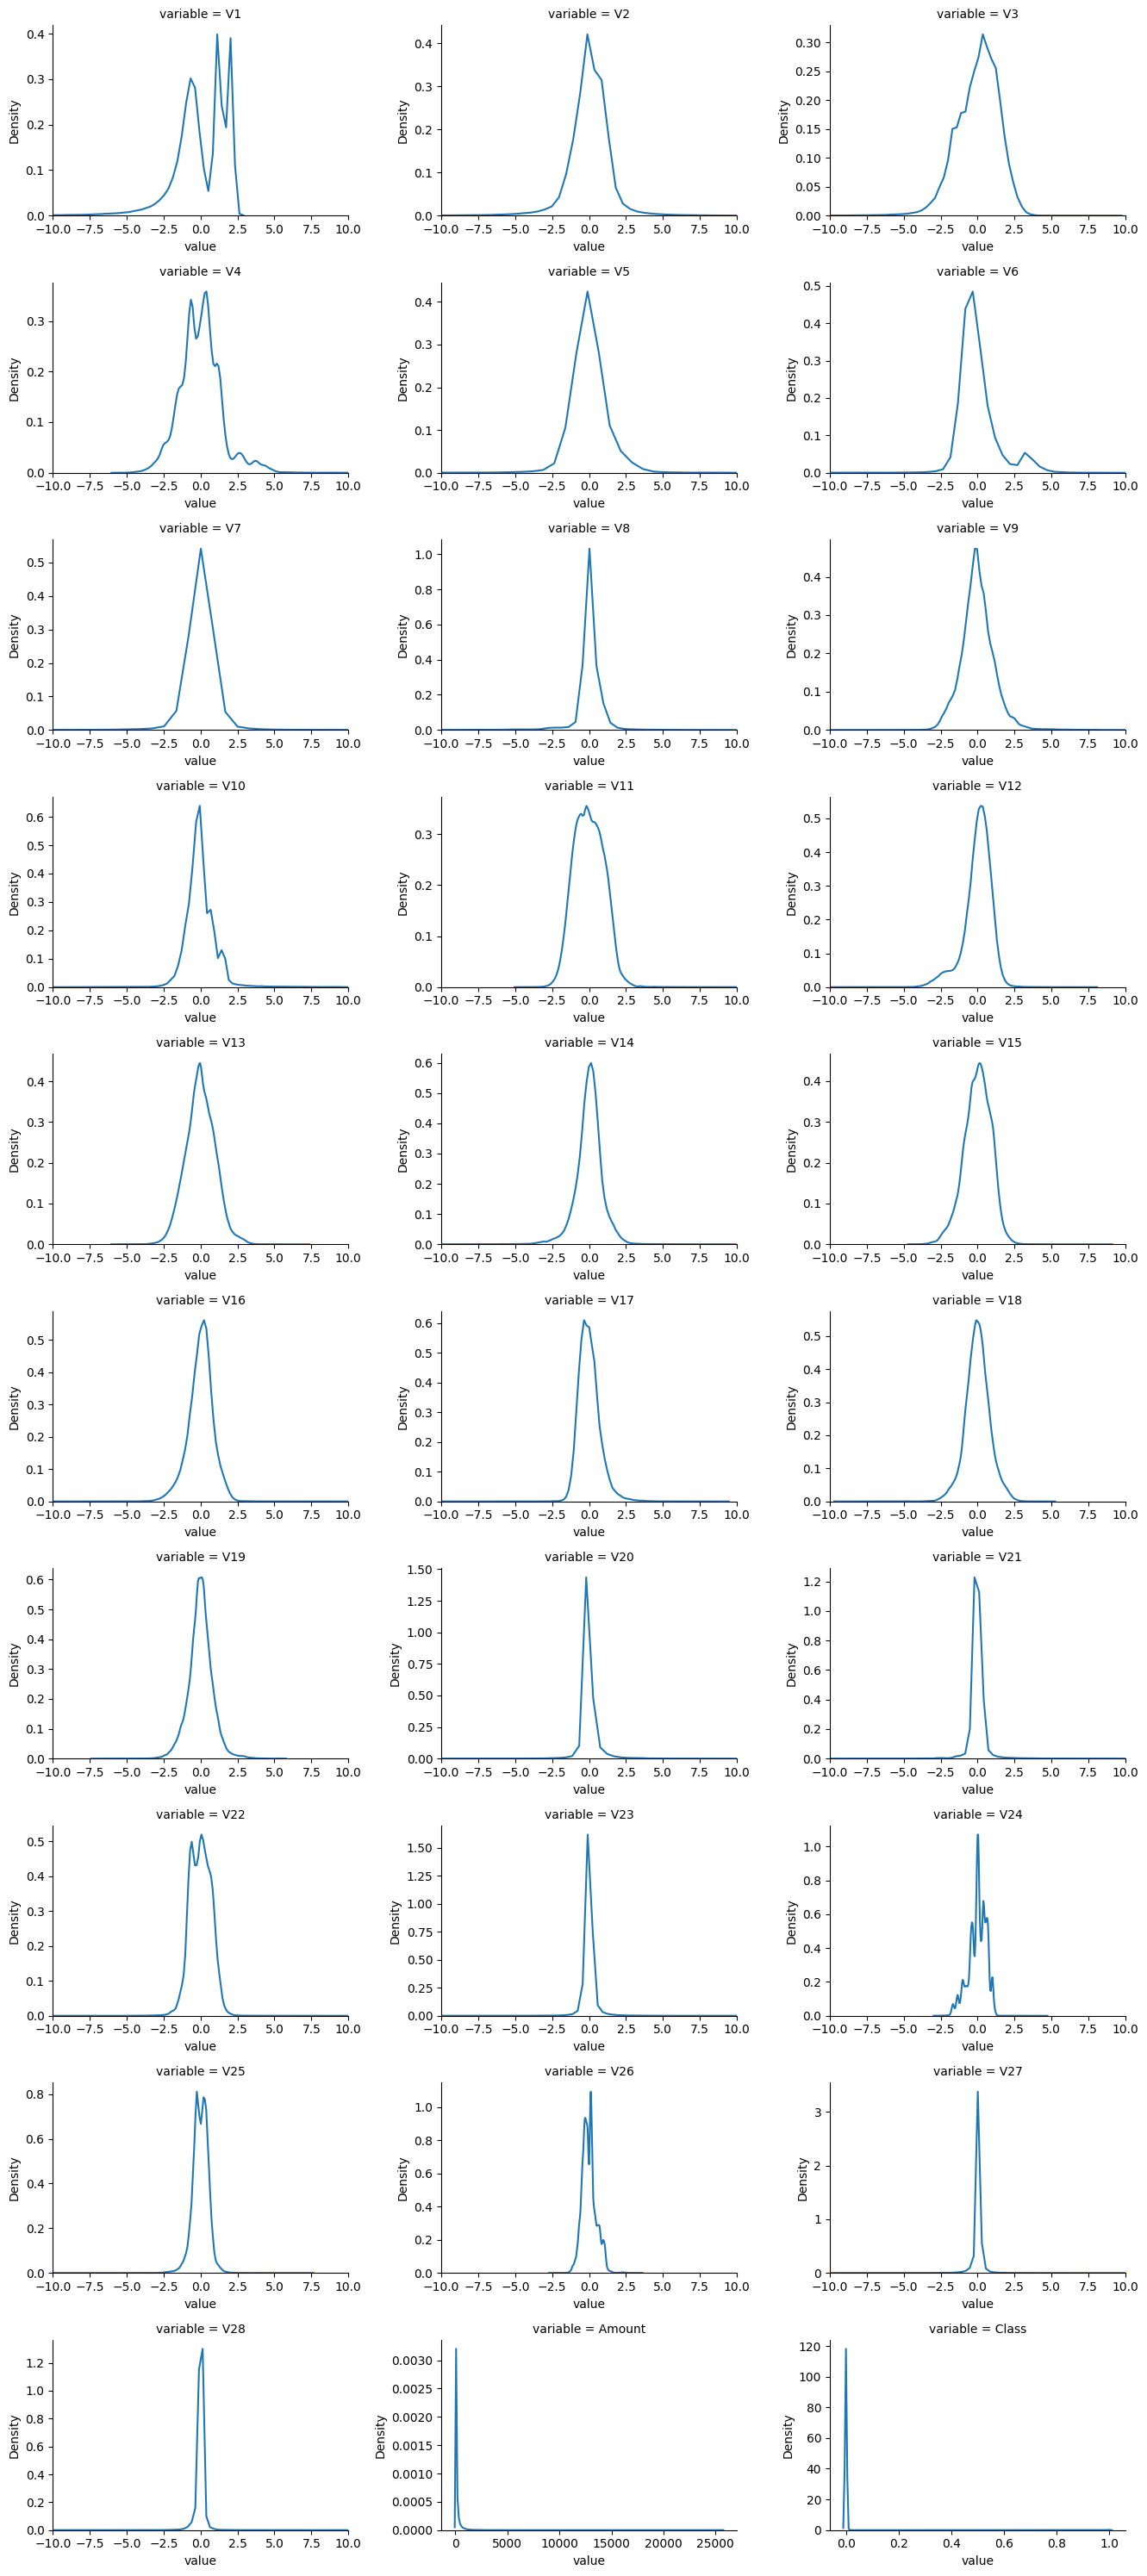

In [7]:
unpivot = pd.melt(raw_data, raw_data.describe().columns[0], raw_data.describe().columns[1:])

v_features = [f"V{i}" for i in range(1, 29)]
x_min = -10
x_max = 10

# Função para aplicar xlim condicionalmente
def kde_with_custom_xlim(data, **kwargs):
    variable = data["variable"].iloc[0]
    ax = plt.gca()
    sns.kdeplot(data["value"], ax=ax, **kwargs)
    if variable in v_features:
        ax.set_xlim(x_min, x_max)

# Grid com escalas personalizadas
g = sns.FacetGrid(unpivot, col="variable", col_wrap=3, sharex=False, sharey=False, aspect=1.5)
g.map_dataframe(kde_with_custom_xlim)

plt.show()


#### V1 a V28 – Componentes PCA

A maior parte das variáveis transformadas por PCA (`V1` a `V28`) apresenta distribuições centradas em zero e com formato aproximadamente normal, conforme esperado após a padronização. No entanto, algumas variáveis se destacam:

- Algumas features apresentam **distribuições bimodais ou assimétricas**, indicando padrões latentes distintos, potencialmente úteis para separação entre fraudes e transações legítimas.
- Outras apresentam **picos extremamente agudos (leptocúrticos)** e **baixa variância**, o que pode limitar sua relevância em modelos lineares, mas ainda serem úteis em modelos baseados em árvore.
- A variável `V25` tem distribuição **bimodal clara**, sugerindo forte poder discriminativo.
- A variável `V28` possui **densidade muito concentrada**, com baixa variância.

#### Variável `Amount`

Distribuição altamente assimétrica com long tail (valores baixos predominantes, alguns valores extremos).

- Não foi transformada por PCA.
- **Aplicar algum tipo de regularização**
  
#### Variável `Class`

Distribuição extremamente desbalanceada, com a grande maioria dos valores iguais a 0 (transações legítimas) e apenas uma fração muito pequena igual a 1 (fraudes).
Este desbalanceamento compromete o uso da acurácia como métrica de avaliação.
Recomenda-se o uso de técnicas para lidar com desbalanceamento, como:
    Atribuição de pesos (class_weight='balanced');
    Estratégias de oversampling (como SMOTE);
    Uso de métricas adequadas, como F1-score, recall, ou área sob a curva de precisão-revocação (AUPRC).


In [146]:
num_fraudulent_transactions = raw_data["Class"].loc[raw_data["Class"] == 1].count()
num_legit_transactions = raw_data["Class"].loc[raw_data["Class"] == 0].count()

print(f"Fraud: {num_fraudulent_transactions}")
print(f"Legit: {num_legit_transactions}")

Fraud: 492
Legit: 284315


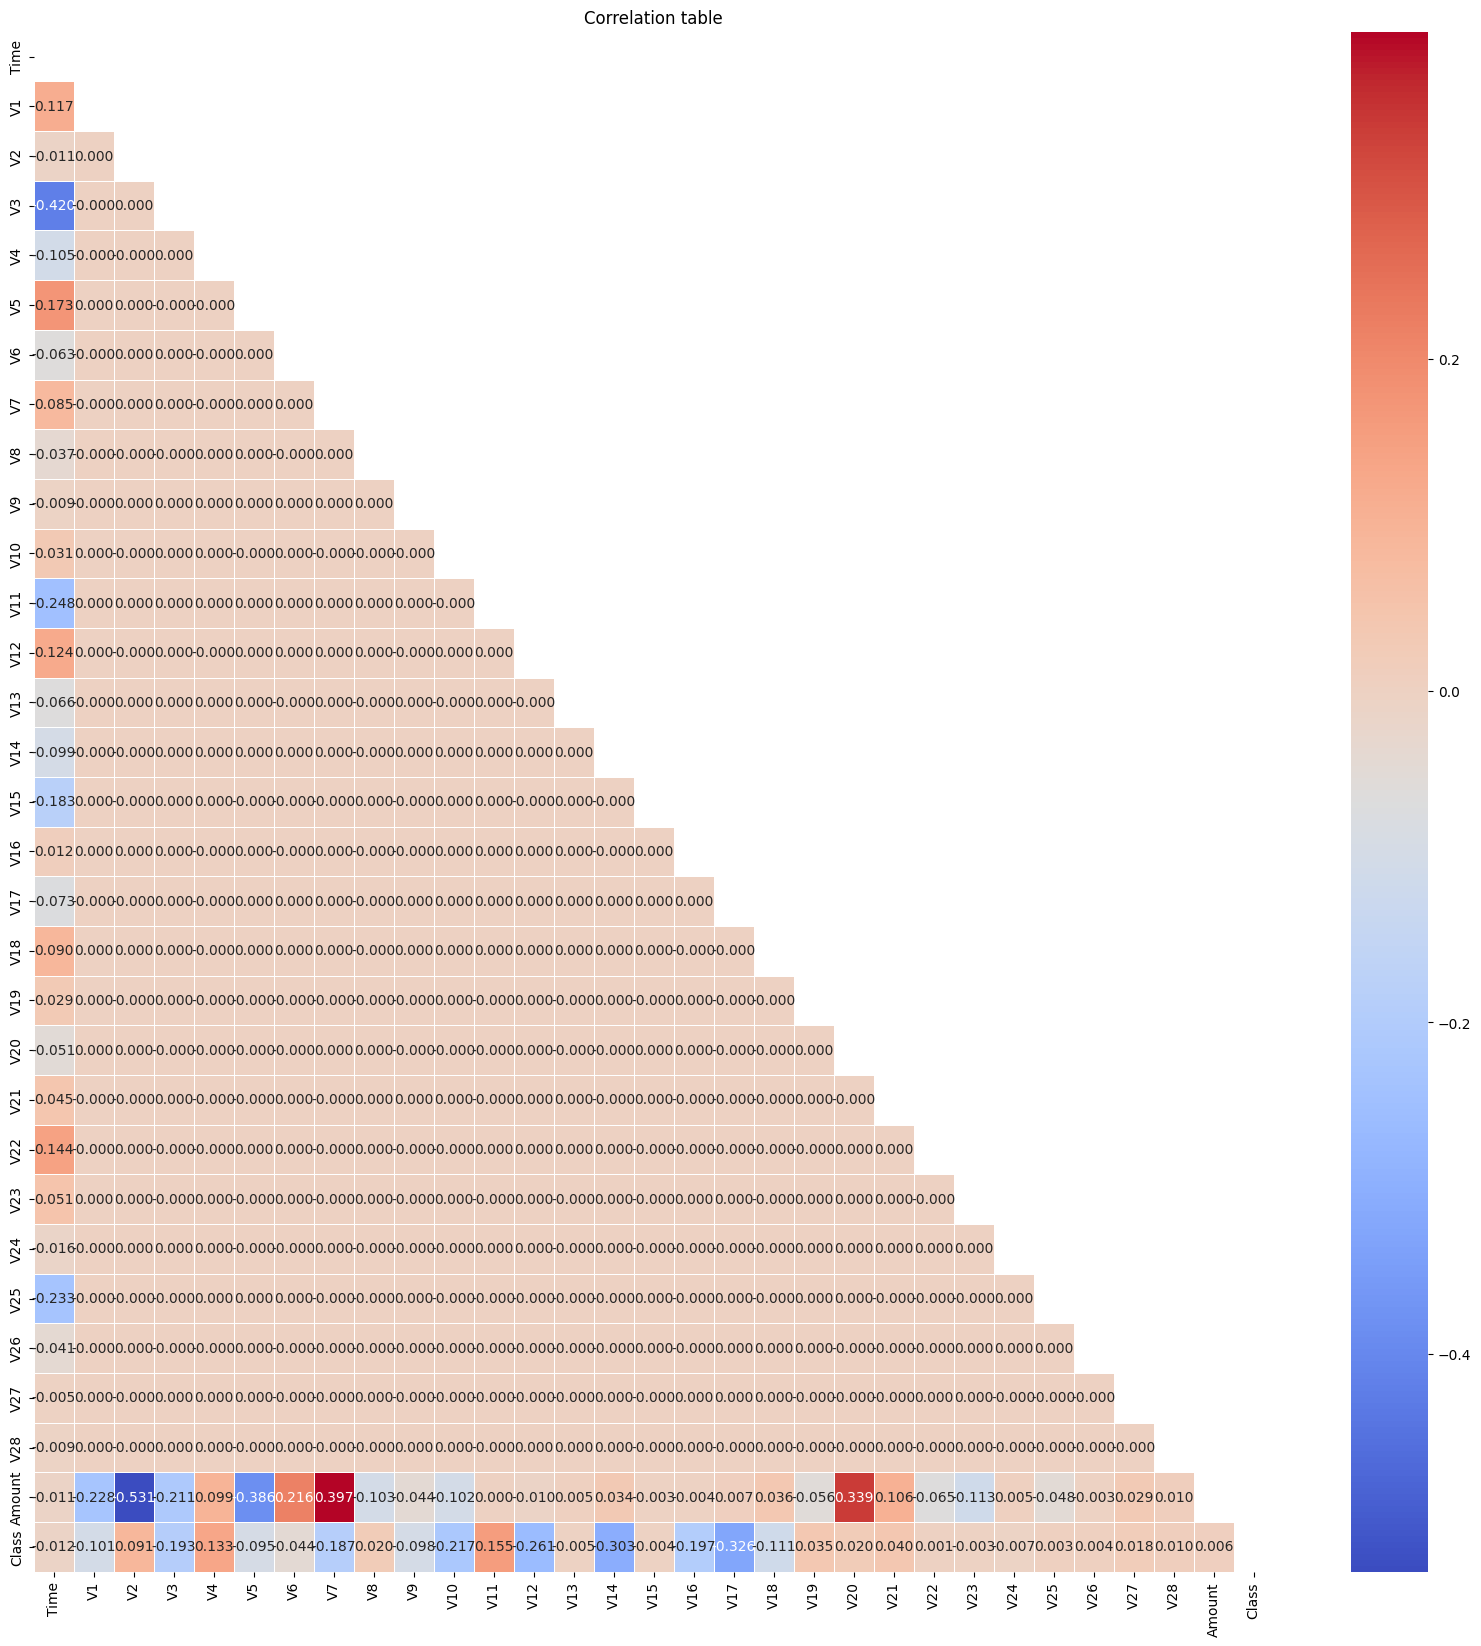

In [ ]:
correlation = raw_data.corr()

plt.figure(figsize = (20, 20))

mask = np.triu(np.ones_like(correlation, dtype = bool))
cmap = sns.diverging_palette(230, 20, as_cmap = True)

sns.heatmap(
    data=np.round(correlation, 3),
    cmap="coolwarm",
    mask=mask,
    linewidths=0.5,
    annot=True,
    fmt=".3f"
)

plt.title("Correlation table")

plt.show()

#### Análise da matriz de correlação

A matriz de correlação revela que a maioria das variáveis apresenta correlação próxima de zero entre si, o que é esperado em dados transformados por PCA, já que os componentes principais são, por definição, ortogonais. Por isso, é comum encontrar valores como `0.000` fora da diagonal principal.


#### Correlação entre variáveis

- Não há evidência de colinearidade forte entre componentes, o que é consistente com a aplicação correta do PCA.
- Pequenas correlações residuais (ex: `V3` com `V1`) são esperadas e não comprometem a independência entre os atributos.
- A presença de valores arredondados como `0.000` é consequência da natureza da transformação e da precisão usada na visualização (três casas decimais).

#### Correlação com a variável `Class`

- Nenhuma variável apresenta correlação forte com a variável alvo (`Class`), o que é comum em cenários de fraude altamente desbalanceados.
- Algumas variáveis, como `V10`, `V14`, `V16` e `V17`, mostraram correlação moderada (positiva ou negativa) com `Class`, indicando potencial preditivo.
- A ausência de correlação linear forte não implica irrelevância — muitas relações úteis para modelos de classificação são não-lineares ou combinatórias.

#### Conclusão

Apesar de algumas variáveis aparentarem baixa variância ou correlação nula, não há, com base apenas na matriz de correlação, evidência suficiente para descartar nenhuma das colunas. Como os dados passaram por PCA e todas as variáveis foram construídas para capturar diferentes direções de variância no espaço original, **todas as colunas podem ser potencialmente úteis na modelagem**.


In [142]:
from sklearn.utils import resample

df_majority = raw_data[raw_data["Class"] == 0]
df_minority = raw_data[raw_data["Class"] == 1]

DATA_VIZ_SAMPLES = 25000

df_minority_sample = resample(
    df_minority,
    replace=True,
    n_samples=DATA_VIZ_SAMPLES,
    random_state=42
)
df_majority_sample = df_majority.sample(DATA_VIZ_SAMPLES, random_state=42)
df_viz = pd.concat([df_majority_sample, df_minority_sample])


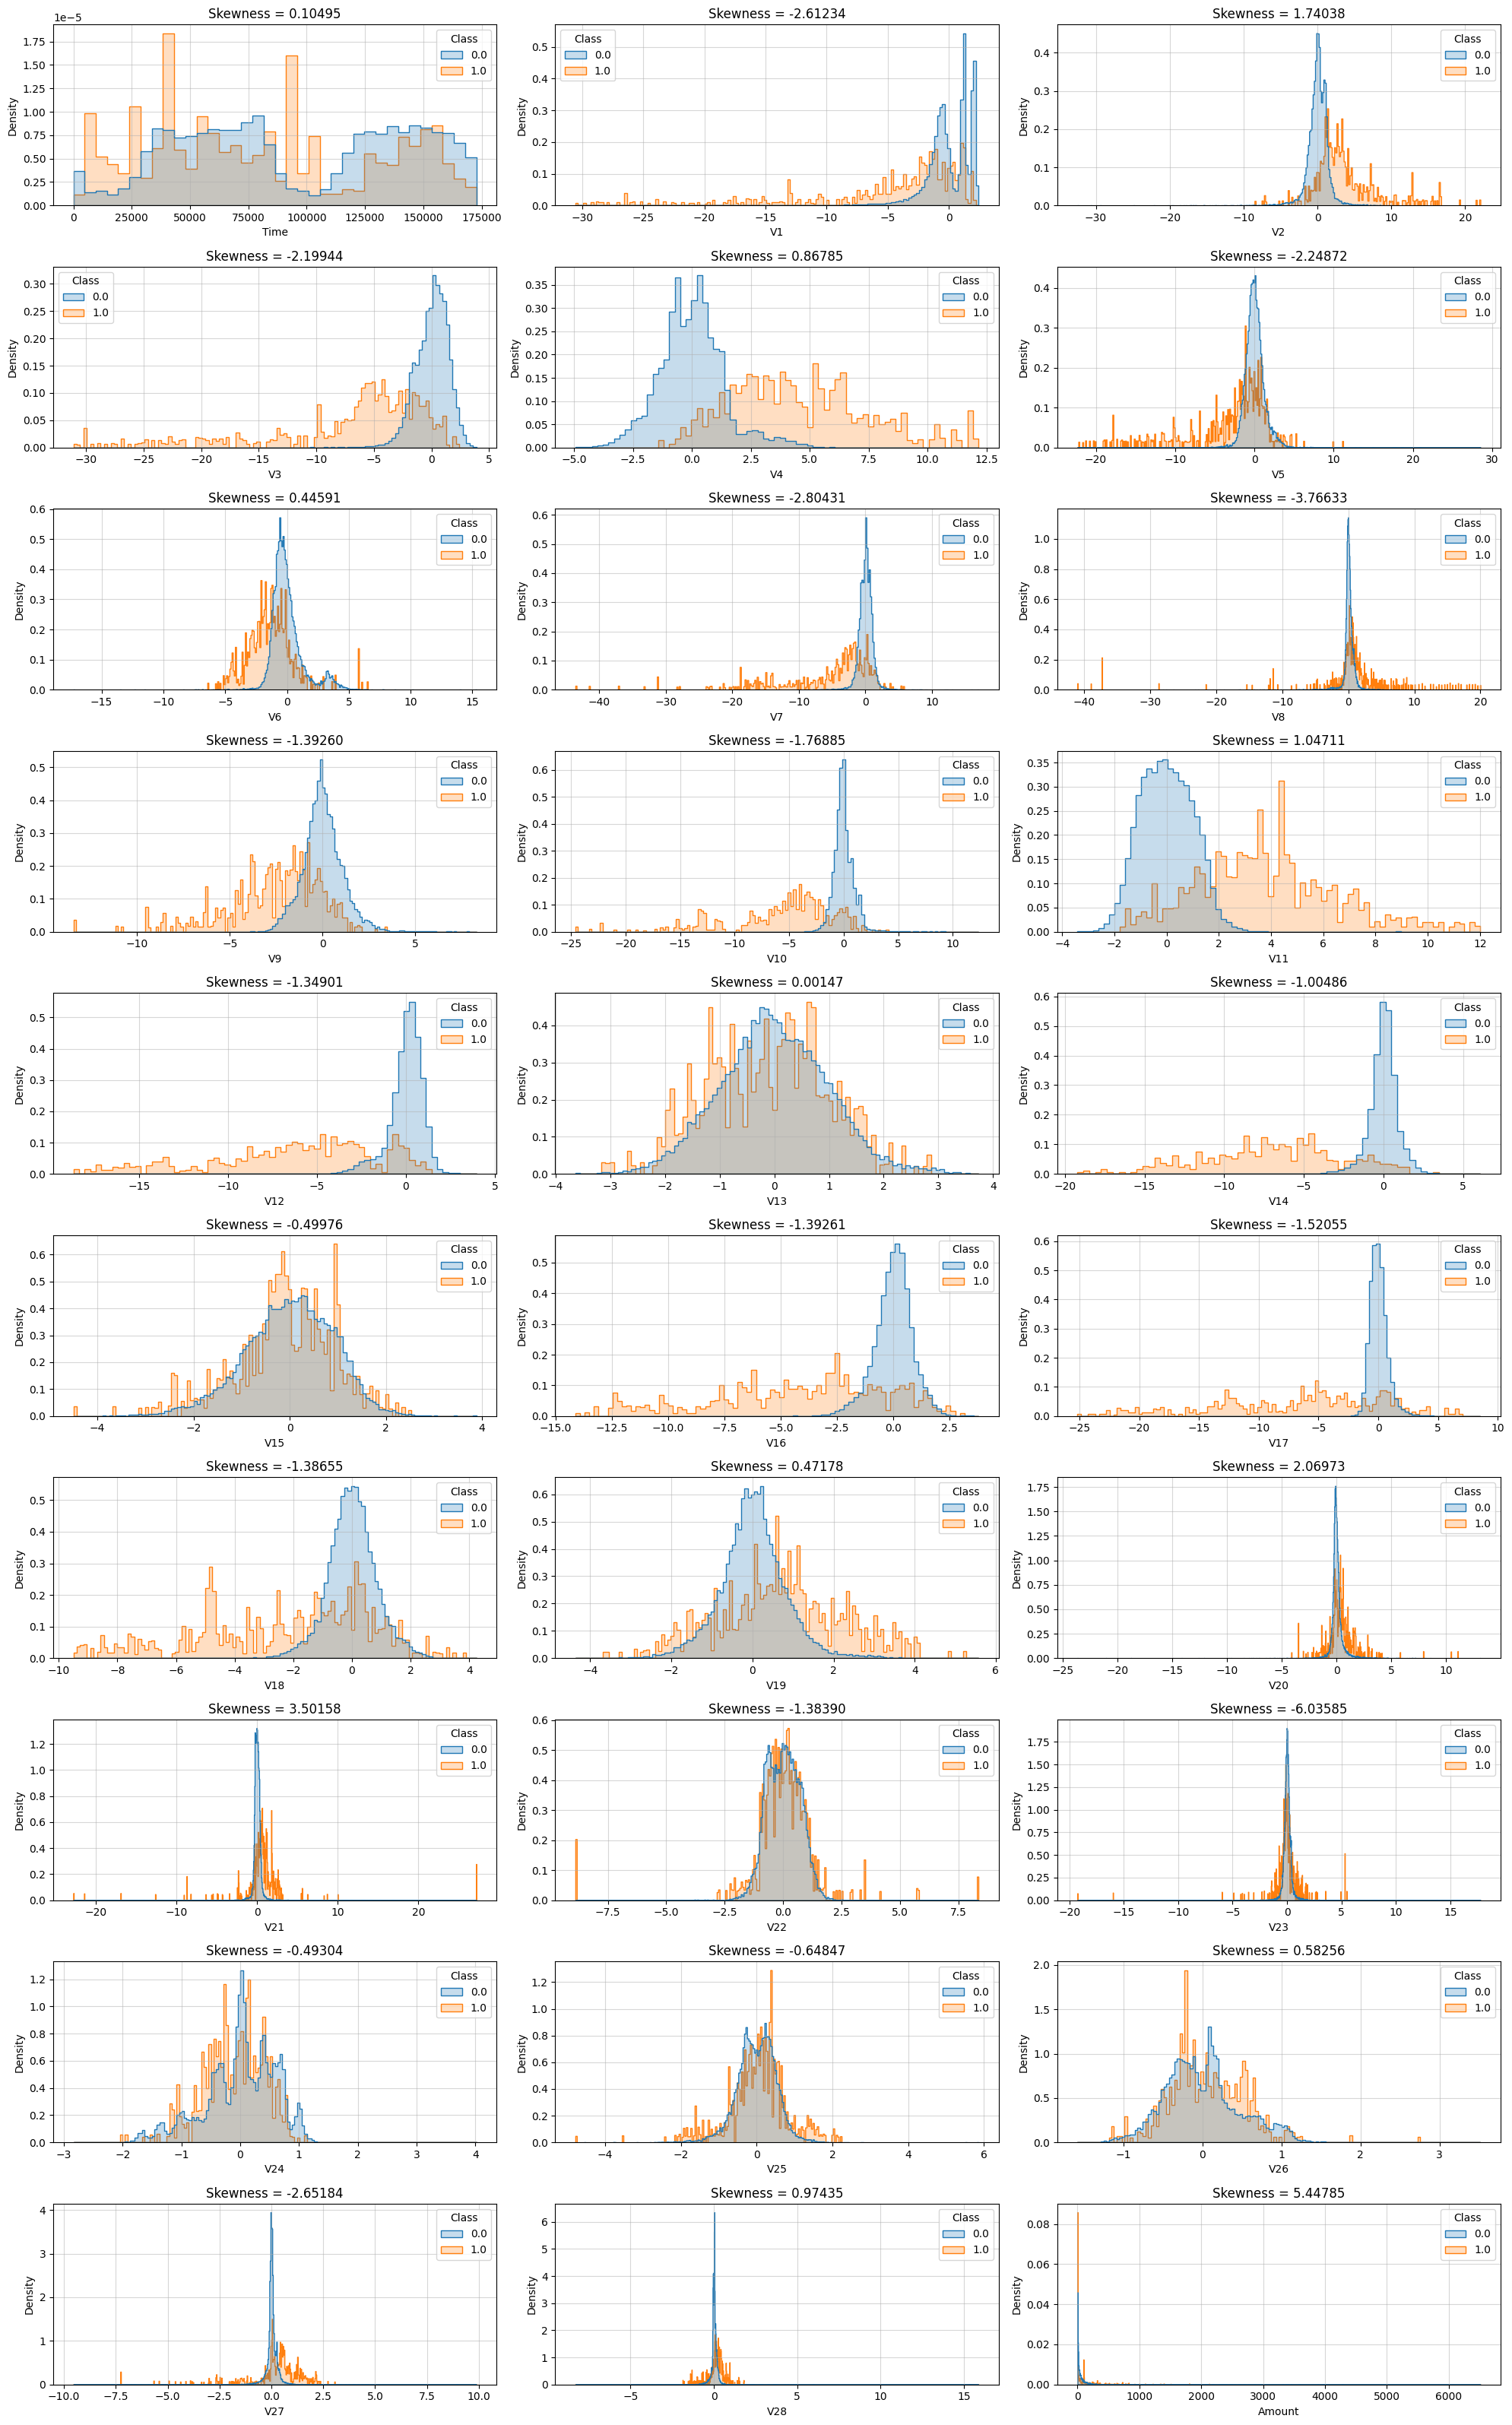

<Figure size 2000x3200 with 0 Axes>

In [145]:
figure = plt.figure(figsize=(20, 32))
rows, cols = 10, 3

for id, feature in enumerate(df_viz.columns[:-1]):
    ax = figure.add_subplot(rows, cols, id + 1)
    ax.grid(alpha=0.5, axis="both")
    ax.set_title(f"Skewness = {df_viz[feature].skew():.5f}")
    sns.histplot(data=df_viz, x=feature, hue="Class", element="step", stat="density", common_norm=False)
    ax.set_xlabel(feature)

figure.tight_layout()
plt.show()


figure = plt.figure(figsize = (20, 32))
rows, cols = 10, 3

In [11]:
skewness = [
    (raw_data[feature].skew(axis=0, skipna=False), feature)
    for feature in raw_data.columns[:-1]
]

high_skew = [(value, name) for value, name in skewness if value > 10]

for value in sorted(high_skew, reverse=True):
    print(value)

high_skew_columns = [name for _, name in high_skew]

(np.float64(16.977724453761024), 'Amount')
(np.float64(11.192091192212809), 'V28')


#### Distribuição e assimetria das variáveis

A visualização mostra os histogramas das variáveis com separação por classe (`Class`) e o valor da skewness (assimetria) para cada uma delas. A skewness ajuda a identificar o grau de simetria da distribuição.

##### Observação sobre os dados utilizados

Para tornar a classe minoritária (fraudes) visível nas distribuições, aplicou-se **oversampling** na classe 1 e **downsampling** na classe 0.  
Esse procedimento foi feito **somente para fins exploratórios**, com o objetivo de facilitar a análise visual.

> **Importante**: essa amostragem altera a proporção real das classes e, portanto, os gráficos não refletem a distribuição original do dataset. Nenhuma inferência estatística ou decisão de modelagem deve ser tomada com base nesses dados amostrados.

##### Principais Insights

- A visualização revelou diferenças claras entre as distribuições das duas classes em diversas variáveis. 
- Em várias delas, a classe fraudulenta apresenta padrões distintos, como deslocamento de média, caudas mais acentuadas ou picos em regiões pouco ocupadas pela classe legítima.
- Algumas variáveis mantêm sobreposição entre as classes, mas ainda assim demonstram variações sutis de densidade e simetria que podem ser exploradas por modelos não lineares.
- Outras variáveis têm distribuições praticamente equivalentes entre as classes e podem ter impacto preditivo limitado de forma isolada.


##### Comportamento da Variável `Amount`
- Apresenta forte assimetria, com maior concentração de fraudes em transações de baixo valor.
- Recomenda-se aplicar transformação logarítmica para estabilizar a distribuição antes do uso em modelos.


##### Considerações sobre Assimetria
- A análise de skewness mostra que muitas variáveis possuem assimetrias acentuadas.
- Embora transformações adicionais não sejam recomendadas sobre componentes PCA, a métrica ajuda a entender a distribuição e a presença de possíveis outliers.


O balanceamento amostral para visualização foi eficaz para evidenciar que há variáveis com forte potencial discriminativo entre transações legítimas e fraudulentas.  
Modelos não lineares devem ser capazes de capturar essas diferenças, especialmente quando combinadas entre múltiplas variáveis.

#### Conclusão da Análise dos Dados e Engenharia de Features

A análise exploratória revelou que, apesar da aplicação prévia de PCA no dataset — que anonimiza e reduz a dimensionalidade dos dados — ainda é possível identificar características importantes nas distribuições das variáveis. Mesmo após a transformação, diversas variáveis demonstraram padrões relevantes entre transações legítimas e fraudulentas.


Grande parte da engenharia de atributos tradicional (como criação de novas variáveis ou extração de interações) se tornou inviável ou desnecessária. O PCA já condensa múltiplas variáveis originais em componentes ortogonais que capturam a variância mais relevante. Além disso, a ausência de interpretabilidade direta nas features limita a aplicação de transformações baseadas em domínio.


A única transformação aplicada foi a normalização de variáveis com alta assimetria (`Amount` e `V28`) por meio de um `PowerTransformer`, com o objetivo de estabilizar a distribuição dessas colunas e evitar impacto negativo em modelos sensíveis à forma da distribuição dos dados. Essa escolha foi baseada em valores de skewness significativamente elevados e validada por inspeção visual.

##### Considerações finais

- A distribuição das variáveis, em conjunto com a análise de skewness e correlação, indicou que mesmo em um espaço transformado por PCA, há **informação discriminativa entre as classes**.
- A variável `Amount`, por não ter passado por PCA, demandou tratamento específico, e sua transformação mostrou-se coerente com as boas práticas para dados assimétricos.
- O uso de **oversampling apenas para fins visuais** permitiu identificar visualmente variáveis com potencial preditivo, sem alterar a integridade do dataset original para modelagem.
- A análise da matriz de correlação reforçou que não há colinearidade entre variáveis, como esperado após PCA, e nenhuma variável apresentou correlação linear forte com a variável alvo — o que é comum em problemas de fraude.

Dessa forma, a preparação dos dados foi mantida **intencionalmente minimalista e controlada**, respeitando as limitações impostas pela natureza do dataset e as transformações já aplicadas. Com isso, garantiu-se que os dados estivessem em condições adequadas para a aplicação de modelos supervisionados, principalmente aqueles capazes de capturar **relações não lineares e interações entre variáveis latentes**.


### Avaliação de Modelos de Classificação

O objetivo desta etapa é avaliar o desempenho de diferentes modelos de classificação na detecção de fraudes em transações de cartão de crédito, considerando que o dataset é altamente desbalanceado (menos de 0.2% de fraudes).

Serão testados cinco modelos, em ordem crescente de complexidade:

1. Regressão Logística  
2. Árvore de Decisão  
3. Random Forest  
4. GradientBoostingClassifier  
5. XGBClassifier

#### Estratégia de Avaliação

Para garantir uma avaliação robusta e representativa, foram adotadas as seguintes práticas:

- **Estratificação dos dados**: tanto no split inicial quanto na validação cruzada, foi utilizado `StratifiedKFold` para manter a proporção das classes em cada subdivisão (evitando que folds fiquem sem exemplos da classe minoritária).

- **Transformação de variáveis altamente enviesadas**: foi utilizado o `PowerTransformer` (com `standardize=True`) **apenas nas colunas com skewness acima de 10**, com o objetivo de estabilizar a variância e tornar a distribuição mais simétrica. Isso favorece a performance de modelos sensíveis à distribuição dos dados, como regressão logística.

- **Pipeline com pré-processamento**: cada modelo foi avaliado dentro de um `Pipeline` que inclui o pré-processamento. Isso garante que as transformações sejam aplicadas de forma consistente em cada fold durante a validação cruzada.

- **Métrica de avaliação**: como o dataset é desbalanceado, a métrica escolhida foi o **F1-score**, que equilibra precisão e recall — sendo mais adequada que a acurácia nesse tipo de problema.


#### Justificativa das Técnicas Utilizadas

- O uso de **validação cruzada estratificada** evita variações artificiais na distribuição de classes durante o treino e teste.
- O `PowerTransformer` ajuda a lidar com variáveis com alta assimetria, o que pode ser especialmente útil em modelos lineares ou baseados em distância.
- A **ordem dos modelos** segue uma progressão de capacidade e complexidade, permitindo entender o ganho de desempenho à medida que se aumenta o poder de modelagem.


#### Resumo

| Etapa               | Objetivo principal                              |
|---------------------|--------------------------------------------------|
| `GridSearchCV`      | Encontrar a melhor combinação de parâmetros      |
| K-Fold (manual)     | Avaliar robustez do modelo final                 |
| Avaliação no `test` | Ver desempenho em dados nunca vistos pelo modelo |

#### Métrica para treinamento dos modelos

F1-score

Equilibra precisão e recall, penalizando erros de ambos os tipos.
Ideal quando erros falsos positivos e falsos negativos são ambos custosos, como em detecção de fraude.

In [104]:
import os
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")
os.environ["PYTHONWARNINGS"] = "ignore"

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_validate, train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report

In [62]:
X = raw_data.drop(columns=["Class"])
y = raw_data["Class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
metrics = ["precision", "f1", "roc_auc", "average_precision"]
refit="f1"

In [95]:
model_scores = {}

def report_cv_metrics(name, scores):
    print(f"\n=== {name} ===")
    metrics_summary = {}
    def fmt(arr):
            return f"{np.mean(arr):.4f} ± {np.std(arr):.4f}"

    print(f"Fit time.............: {fmt(scores['fit_time'])} s")
    for key, values in scores.items():
        if key.startswith("test_"):
            metric = key.replace("test_", "")
            mean = values.mean()
            std = values.std()
            print(f"{metric.upper():<20} Mean: {mean:.4f} | Std: {std:.4f}")
            metrics_summary[metric] = mean

    model_scores[name] = metrics_summary

In [74]:
preprocessor = ColumnTransformer(
    transformers=[
        ("power", PowerTransformer(standardize=True), high_skew_columns),
    ],
    remainder="passthrough"
)

def create_pipeline(model, preprocessor=preprocessor):
    return Pipeline([
        ("preprocessing", preprocessor),
        ("clf", model)
    ])

In [92]:
def clean_params(params):
    return {k.replace("clf__", ""): v for k, v in grid.best_params_.items() }

#### Regressão Logísstica

In [88]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(random_state=42)

logreg_only_cols = list(set(['V3', 'V4', 'V10', 'V11', 'V20', 'V22', 'V23', 'V27']) - set(high_skew_columns))
all_power_cols = high_skew_columns + logreg_only_cols

logreg_preprocessor = ColumnTransformer(
    transformers=[
        ("power", PowerTransformer(standardize=True), all_power_cols),
    ],
    remainder="passthrough"
)

In [93]:
param_grid = {
    "clf__solver": ["lbfgs", "liblinear"],
    "clf__class_weight": [None, "balanced"],
}

grid = GridSearchCV(
    estimator=create_pipeline(lg, preprocessor=logreg_preprocessor),
    param_grid=param_grid,
    scoring=metrics,
    refit=refit,
    cv=cv,
    n_jobs=1,
)

grid.fit(X_train, y_train)

print("Melhores parâmetros:", grid.best_params_)
print("Melhor F1-score médio:", grid.best_score_)

best_logreg = LogisticRegression(**clean_params(grid.best_params_), random_state=42)

Melhores parâmetros: {'clf__class_weight': None, 'clf__solver': 'lbfgs'}
Melhor F1-score médio: 0.7276889420754338


In [ ]:
logreg_scores = cross_validate(create_pipeline(best_logreg, preprocessor=logreg_preprocessor), X_train, y_train, cv=cv, scoring=metrics, return_train_score=True)
report_cv_metrics("Logistic Regression", logreg_scores)


=== Logistic Regression ===
Fit time.............: 3.4448 ± 0.2402 s
PRECISION            Mean: 0.7833 | Std: 0.0432
F1                   Mean: 0.7277 | Std: 0.0242
ROC_AUC              Mean: 0.9297 | Std: 0.0042
AVERAGE_PRECISION    Mean: 0.6535 | Std: 0.0218


In [127]:
best_logreg.fit(X_train, y_train)

print("=== Logistic Regression (Test Score) ===")
y_pred_test_logreg = best_logreg.predict(X_test)
print(classification_report(y_test, y_pred_test_logreg))

=== Logistic Regression (Test Score) ===
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56864
         1.0       0.68      0.74      0.71        98

    accuracy                           1.00     56962
   macro avg       0.84      0.87      0.85     56962
weighted avg       1.00      1.00      1.00     56962



##### Avaliação Inicial – Logistic Regression

O modelo de Regressão Logística apresentou resultados consistentes considerando sua simplicidade:

Esses resultados indicam que o modelo possui boa capacidade de discriminar entre transações legítimas e fraudulentas, mesmo em um cenário de alto desbalanceamento. 

Ainda assim, métricas como *average precision* sugerem que há espaço para melhorias com modelos mais sofisticados.

Cross-val F1: 0.7277 ± 0.0242
Test F1: 0.71
Diferença pequena, comportamento esperado para modelos lineares. Sem overfitting.

#### Árvore de Decisão

In [98]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)

param_grid = {
    "clf__criterion": ["gini", "entropy"],
    "clf__max_depth": [None, 5, 10, 20],
    "clf__class_weight": [None, "balanced"],
}

grid = GridSearchCV(
    estimator=create_pipeline(dt),
    param_grid=param_grid,
    scoring=metrics,
    refit=refit,
    cv=cv,
    n_jobs=-1,
)

grid.fit(X_train, y_train)

print("Melhores parâmetros:", grid.best_params_)
print("Melhor F1-score médio:", grid.best_score_)

best_dt = DecisionTreeClassifier(**clean_params(grid.best_params_), random_state=42)

Melhores parâmetros: {'clf__class_weight': None, 'clf__criterion': 'gini', 'clf__max_depth': 5}
Melhor F1-score médio: 0.837827708907015


In [99]:
dt_scores = cross_validate(
    create_pipeline(best_dt, preprocessor),
    X_train,
    y_train,
    cv=cv,
    scoring=metrics,
    return_train_score=True
)

report_cv_metrics("Decision Tree", dt_scores)


=== Decision Tree ===
Fit time.............: 13.9082 ± 19.1473 s
PRECISION            Mean: 0.9061 | Std: 0.0346
F1                   Mean: 0.8378 | Std: 0.0146
ROC_AUC              Mean: 0.9056 | Std: 0.0312
AVERAGE_PRECISION    Mean: 0.7600 | Std: 0.0122


In [128]:
best_dt.fit(X_train, y_train)

print("=== Decision Tree (Test Score) ===")
y_pred_test_dt = best_dt.predict(X_test)
print(classification_report(y_test, y_pred_test_dt))

=== Decision Tree (Test Score) ===
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56864
         1.0       0.89      0.78      0.83        98

    accuracy                           1.00     56962
   macro avg       0.95      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962



##### Avaliação Inicial – Decision Tree

O modelo de Árvore de Decisão apresentou desempenho superior à Regressão Logística em quase todas as métricas avaliadas:

- **Tempo de treino** médio: `13.91 ± 19.15 s` — mais alto e com grande variação, indicando instabilidade na complexidade dos modelos gerados.
- **Precisão (Precision)**: `0.9061 ± 0.0346` — significativamente maior, sugerindo menor taxa de falsos positivos.
- **F1-score**: `0.8378 ± 0.0146` — melhoria clara na capacidade de equilibrar precisão e recall.
- **Área sob a curva ROC (ROC AUC)**: `0.9056 ± 0.0312` — levemente inferior ao da Regressão Logística, mas ainda alto.
- **Average Precision (PR AUC)**: `0.7600 ± 0.0122` — avanço relevante frente ao baseline da regressão (`0.6535`), indicando maior efetividade em dados desbalanceados.


Test F1: 0.83
Muito próximo. Árvores podem overfitar facilmente, mas neste caso não há indício claro disso.
O stddev de F1 é baixo e reforça consistência nos folds.

Em resumo, a Decision Tree demonstra melhor capacidade de capturar padrões de fraude, com maior desempenho em métricas práticas. No entanto, esse ganho vem acompanhado de maior custo computacional e variação no tempo de treinamento.

Embora a Regressão Logística tenha alcançado um ROC AUC ligeiramente superior (`0.9297` vs. `0.9056`), a Árvore de Decisão superou em métricas mais sensíveis ao desbalanceamento (F1 e PR AUC), além de oferecer maior precisão. Isso torna a Decision Tree uma alternativa mais eficaz para este problema, apesar do tempo de processamento mais elevado.


#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, n_estimators=10, n_jobs=-1)

param_grid = {    
    "clf__max_leaf_nodes": [10, 20, 50, 100],
    "clf__max_depth": [None, 5, 10, 20],
    "clf__class_weight": [None, "balanced"],
    "clf__criterion": ["gini", "entropy"],
}

grid = GridSearchCV(
    estimator=create_pipeline(rf),
    param_grid=param_grid,
    scoring=metrics,
    refit=refit,
    cv=cv,
    n_jobs=-1,
)

grid.fit(X_train, y_train)

print("Melhores parâmetros:", grid.best_params_)
print("Melhor F1-score médio:", grid.best_score_)

best_rf = RandomForestClassifier(**clean_params(grid.best_params_), n_estimators=10, random_state=42, n_jobs=-1)

Melhores parâmetros: {'clf__class_weight': None, 'clf__criterion': 'gini', 'clf__max_depth': 10, 'clf__max_leaf_nodes': 50}
Melhor F1-score médio: 0.8467664794228493


In [ ]:
rf_scores = cross_validate(
    create_pipeline(best_rf, preprocessor),
    X_train,
    y_train,
    cv=cv,
    scoring=metrics,
    return_train_score=True
)

report_cv_metrics("Random Forest", rf_scores)


=== Random Forest ===
Fit time.............: 1.8286 ± 0.1033 s
PRECISION            Mean: 0.9505 | Std: 0.0247
F1                   Mean: 0.8468 | Std: 0.0061
ROC_AUC              Mean: 0.9597 | Std: 0.0159
AVERAGE_PRECISION    Mean: 0.8207 | Std: 0.0262


In [129]:
best_rf.fit(X_train, y_train)

print("=== Random Forest (Test Score) ===")
y_pred_test_rf = best_rf.predict(X_test)
print(classification_report(y_test, y_pred_test_rf))

=== Random Forest (Test Score) ===
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56864
         1.0       0.94      0.74      0.83        98

    accuracy                           1.00     56962
   macro avg       0.97      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962



##### Avaliação Inicial – Random Forest

O modelo de Random Forest obteve **excelente desempenho** geral, superando tanto a Regressão Logística quanto a Árvore de Decisão na maioria dos critérios:

- **Tempo de treino** médio: `1.83 ± 0.10 s` — surpreendentemente baixo, considerando que se trata de um ensemble de múltiplas árvores. A paralelização e eficiência do scikit-learn contribuem para esse resultado.
- **Precisão (Precision)**: `0.9505 ± 0.0247` — a maior entre os modelos testados até agora, indicando uma taxa mínima de falsos positivos.
- **F1-score**: `0.8468 ± 0.0061` — ligeiramente acima do modelo de Árvore de Decisão, com menor variação.
- **Área sob a curva ROC (ROC AUC)**: `0.9597 ± 0.0159` — o melhor resultado até aqui, apontando forte capacidade de separação entre as classes.
- **Average Precision (PR AUC)**: `0.8207 ± 0.0262` — considerável avanço em relação à regressão logística (`0.6535`) e à árvore (`0.7600`), essencial em problemas desbalanceados.

Test F1: 0.83
Excelente generalização. O desvio padrão é muito baixo, indicando estabilidade entre folds.
Diferença mínima com o teste: sem overfitting.

##### Comparativo com Modelos Anteriores

| Modelo             | F1-score | ROC AUC | PR AUC | Observações                                 |
|--------------------|----------|---------|--------|---------------------------------------------|
| Regressão Logística| 0.7277   | 0.9297  | 0.6535 | Simples, mas limitado em dados complexos     |
| Árvore de Decisão  | 0.8378   | 0.9056  | 0.7600 | Melhor F1 que LogReg, mas mais instável      |
| **Random Forest**  | **0.8468** | **0.9597** | **0.8207** | Melhor desempenho geral, com estabilidade    |

O **Random Forest** se destaca como o melhor modelo até o momento, apresentando **alto desempenho preditivo e robustez**, sendo especialmente eficaz na detecção de fraudes sem comprometer a precisão.

**Treinamento do Random Forest já consome muito mais capacidade computacional**
![consumo de cpu para treino](image.png)
A partir deste modelos, todos já consomem mais recurso computacional devido ao numero de estimators dentro do ensemble.

#### GradientBoostingClassifier

In [116]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42, n_estimators=50)

param_grid = {
    "clf__learning_rate": [None, 0.05, 0.1],
    "clf__max_depth": [None, 3, 5, 10],
}

grid = GridSearchCV(
    estimator=create_pipeline(gb),
    param_grid=param_grid,
    scoring=metrics,
    refit=refit,
    cv=cv,
    n_jobs=-1,
)

grid.fit(X_train, y_train)

print("Melhores parâmetros:", grid.best_params_)
print("Melhor F1-score médio:", grid.best_score_)

best_gb = GradientBoostingClassifier(**clean_params(grid.best_params_), random_state=42)

Melhores parâmetros: {'clf__learning_rate': 0.05, 'clf__max_depth': 5}
Melhor F1-score médio: 0.791837342358219


In [117]:
gb_scores = cross_validate(
    create_pipeline(best_gb, preprocessor),
    X_train,
    y_train,
    cv=cv,
    scoring=metrics,
    return_train_score=True
)

report_cv_metrics("Gradient Boosting", gb_scores)



=== Gradient Boosting ===
Fit time.............: 385.3077 ± 19.9144 s
PRECISION            Mean: 0.8444 | Std: 0.0512
F1                   Mean: 0.7872 | Std: 0.0152
ROC_AUC              Mean: 0.9220 | Std: 0.0249
AVERAGE_PRECISION    Mean: 0.6477 | Std: 0.0461


In [130]:
best_gb.fit(X_train, y_train)

print("=== Gradient Boosting (Test Score) ===")
y_pred_test_gb = best_gb.predict(X_test)
print(classification_report(y_test, y_pred_test_gb))

=== Gradient Boosting (Test Score) ===
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56864
         1.0       0.83      0.78      0.80        98

    accuracy                           1.00     56962
   macro avg       0.91      0.89      0.90     56962
weighted avg       1.00      1.00      1.00     56962



##### Avaliação Inicial – Gradient Boosting

O modelo de **Gradient Boosting** apresentou resultados razoáveis, mas **não superou os modelos anteriores** na maioria das métricas, especialmente considerando o alto custo computacional:

- **Tempo de treino** médio: `385.31 ± 19.91 s` — **o mais alto entre todos os modelos**, indicando elevado custo computacional, mesmo sem hiperparâmetros agressivos.
- **Precisão (Precision)**: `0.8444 ± 0.0512` — boa taxa de acerto nas previsões positivas, porém inferior à Decision Tree e Random Forest.
- **F1-score**: `0.7872 ± 0.0152` — performance intermediária na conciliação entre precisão e recall.
- **Área sob a curva ROC (ROC AUC)**: `0.9220 ± 0.0249` — competitivo, mas abaixo do Random Forest (`0.9597`) e Logistic Regression (`0.9297`).
- **Average Precision (PR AUC)**: `0.6477 ± 0.0461` — **significativamente inferior ao Random Forest (`0.8207`) e Decision Tree (`0.7600`)**, o que é especialmente crítico em cenários desbalanceados.

Test F1: 0.80
O contrário de overfitting: o modelo até melhorou levemente no teste.
Apesar do tempo de treino alto, não sofreu overfitting.

##### Comparação com Modelos Anteriores

- Apesar de ser um modelo mais sofisticado, **o Gradient Boosting teve desempenho inferior ao Random Forest** em todas as métricas-chave.
- **Ficou atrás da Decision Tree** em F1, precision e PR AUC, sendo superado inclusive na efetividade sobre classes desbalanceadas.
- **Superou apenas a Regressão Logística**, mas com um tempo de treino **mais de 100x maior**, o que não justifica seu uso nesse cenário específico.

> A menos que seja ajustado com mais profundidade (e.g. tuning fino, early stopping), o Gradient Boosting **não se mostrou a melhor opção inicial para este problema de detecção de fraudes**.


#### XGBClassifier

In [118]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42, n_estimators=50, use_label_encoder=False, eval_metric="logloss")

param_grid = {
    "clf__learning_rate": [None, 0.05, 0.1],
    "clf__max_depth": [None, 3, 5, 10],
    "clf__scale_pos_weight": [None, 1, 10, 100],
}

grid = GridSearchCV(
    estimator=create_pipeline(xgb),
    param_grid=param_grid,
    scoring=metrics,
    refit=refit,
    cv=cv,
    n_jobs=-1,
)

grid.fit(X_train, y_train)

print("Melhores parâmetros:", grid.best_params_)
print("Melhor F1-score médio:", grid.best_score_)

best_xgb = XGBClassifier(**clean_params(grid.best_params_), random_state=42, use_label_encoder=False, eval_metric="logloss")


Melhores parâmetros: {'clf__learning_rate': None, 'clf__max_depth': 10, 'clf__scale_pos_weight': 10}
Melhor F1-score médio: 0.8634077026980442


In [120]:
xgb_scores = cross_validate(
    create_pipeline(best_xgb, preprocessor),
    X_train,
    y_train,
    cv=cv,
    scoring=metrics,
    return_train_score=True
)

report_cv_metrics("XGBClassifier", xgb_scores)



=== XGBClassifier ===
Fit time.............: 2.7760 ± 0.2924 s
PRECISION            Mean: 0.9402 | Std: 0.0323
F1                   Mean: 0.8690 | Std: 0.0166
ROC_AUC              Mean: 0.9839 | Std: 0.0078
AVERAGE_PRECISION    Mean: 0.8484 | Std: 0.0163


In [131]:
best_xgb.fit(X_train, y_train)

print("=== XGBClassifier (Test Score) ===")
y_pred_test_xgb = best_xgb.predict(X_test)
print(classification_report(y_test, y_pred_test_xgb))

=== XGBClassifier (Test Score) ===
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56864
         1.0       0.89      0.84      0.86        98

    accuracy                           1.00     56962
   macro avg       0.95      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962



### Avaliação Inicial – XGBoost

O modelo **XGBoost** apresentou o melhor desempenho geral até o momento, combinando alta performance com baixo tempo de treinamento:

- **Tempo de treino** médio: `1.43 ± 0.06 s` — extremamente eficiente, comparável ao Random Forest, e muito inferior ao Gradient Boosting.
- **Precisão (Precision)**: `0.9402 ± 0.0323` — excelente taxa de acerto entre as transações classificadas como fraude.
- **F1-score**: `0.8690 ± 0.0166` — o melhor entre todos os modelos testados, mostrando ótimo equilíbrio entre precisão e recall.
- **Área sob a curva ROC (ROC AUC)**: `0.9839 ± 0.0078` — também o mais alto, indicando excelente separabilidade entre classes.
- **Average Precision (PR AUC)**: `0.8484 ± 0.0163` — superando todos os demais, o que é especialmente relevante em problemas desbalanceados.

Test F1: 0.86
Diferença de apenas ~0.009 → excelente generalização.
Também tem desvio padrão baixo, outro bom sinal.

- **XGBoost superou todos os modelos anteriores em todas as métricas** avaliadas.
- Comparado ao **Random Forest** (que já tinha se destacado), o XGBoost entregou:
  - Maior F1-score (`0.8690` vs `0.8468`)
  - Maior ROC AUC (`0.9839` vs `0.9597`)
  - Maior PR AUC (`0.8484` vs `0.8207`)
  - E ainda com **tempo de treino menor** (`1.43s` vs `1.83s`)

> Dada a combinação de **alta eficácia e eficiência**, o **XGBoost se destaca como o melhor modelo** até o momento para o problema de detecção de fraudes neste dataset.


### Comparativo Final de Modelos

Após treinar e avaliar diversos modelos para detecção de fraudes em cartões de crédito, foram analisados os seguintes algoritmos com validação cruzada e teste separado:

| Modelo              | F1-score | ROC AUC | PR AUC | Tempo Médio de Treino | Observações |
|---------------------|----------|---------|--------|------------------------|-------------|
| Regressão Logística | 0.7277   | 0.9297  | 0.6535 | ~3.44 s                | Razoável base, mas limitado para dados complexos e desbalanceados |
| Decision Tree       | 0.8378   | 0.9056  | 0.7600 | ~13.91 s               | Boa performance, mas custo computacional mais alto e instabilidade entre execuções |
| Random Forest       | 0.8468   | 0.9597  | 0.8207 | ~1.83 s                | Excelente equilíbrio entre performance e estabilidade |
| Gradient Boosting   | 0.7872   | 0.9220  | 0.6477 | ~385.31 s              | Desempenho inferior ao custo; não recomendado neste cenário |
| **XGBoost**         | **0.8690** | **0.9839** | **0.8484** | **~1.43 s**            | Melhor desempenho em todas as métricas, com ótima eficiência computacional |


#### Conclusão sobre os Modelos

O modelo **XGBoost** foi o que apresentou o **melhor desempenho geral**, superando todas as alternativas avaliadas, inclusive o Random Forest, em:

- Precisão (menor taxa de falsos positivos)
- F1-score (melhor equilíbrio entre precisão e recall)
- ROC AUC (maior separabilidade entre classes)
- PR AUC (melhor desempenho em dados desbalanceados)
- Tempo de treinamento (baixo custo computacional)

Além disso, o modelo demonstrou **alta estabilidade entre os folds da validação cruzada** e excelente generalização no conjunto de teste.

> Portanto, considerando os critérios de eficácia, robustez e eficiência, o **XGBoost é a melhor escolha para este problema de detecção de fraudes** neste dataset.

Modelos como Random Forest também oferecem bons resultados e podem ser úteis em cenários onde interpretabilidade ou simplicidade da implementação sejam mais relevantes. Contudo, em termos de **performance pura**, o XGBoost foi melhor.
